# Introduction to Pandas

Pandas is a high-performance library providing data structures, data analysis and manipulation tools designed to make data cleaning and analysis fast and convenient in Python. 



To use pandas, first inport pandas (together with other python libraries):

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Series

##### Series: Introduction

The simplest series can be formed from a list of data:

In [3]:
# Creating a Series
obj = pd.Series([4, 7, -5, 3])

print(obj)

0    4
1    7
2   -5
3    3
dtype: int64


To obtain the array (or value) representation and index object of a Series, use the .array and .index attributes:


In [4]:
obj.array

<NumpyExtensionArray>
[np.int64(4), np.int64(7), np.int64(-5), np.int64(3)]
Length: 4, dtype: int64

In [5]:
obj.index

RangeIndex(start=0, stop=4, step=1)

To create a Series with an index where each data point is identified with a label:

In [6]:
obj2 = pd.Series([4, 7, -5, 3], index=["A", "B", "C", "D"])

In [7]:
obj2

A    4
B    7
C   -5
D    3
dtype: int64

In [8]:
obj2.index

Index(['A', 'B', 'C', 'D'], dtype='object')

You can now use the labels to select the values in the series:

In [9]:
obj2["A"]

np.int64(4)

In [10]:
obj2["C"]

np.int64(-5)

In [11]:
obj2[ ["C", "A", "D"] ]  # using a list of indices

C   -5
A    4
D    3
dtype: int64

We can use NumPy-like operations, such as filtering with a Boolean array, scalar multiplication, or applying math functions:

In [12]:
obj2 > 0

A     True
B     True
C    False
D     True
dtype: bool

In [13]:
obj2[obj2 > 0]

A    4
B    7
D    3
dtype: int64

In [14]:
obj2 * 2

A     8
B    14
C   -10
D     6
dtype: int64

In [15]:
np.exp(obj2)

A      54.598150
B    1096.633158
C       0.006738
D      20.085537
dtype: float64

### **Exercise 1**
#### Series Example: Bubble Tea Menu 

Consider the following example :


In [18]:
# Use these two lists from our Dictionaries exercise:
drinks = ['Classic Milk Tea', 'Taro Milk Tea', 'Matcha Latte', 
          'Jasmine Green Tea', 'Thai Milk Tea']
prices = [3.5, 4.5, 4.2, 3.7, 4.5]

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
# Create a menu using Series, with 
#    "drinks" as index, and 
#    "price" as value. 

menu = pd.Series(prices, index=drinks)

menu

Classic Milk Tea     3.5
Taro Milk Tea        4.5
Matcha Latte         4.2
Jasmine Green Tea    3.7
Thai Milk Tea        4.5
dtype: float64

Observe both index and array above are not provided with any names yet. 

Use the .name attribute to assign names to the Series values and its index.
Assign the name "Price" to the values of menu, and the name "Drinks" to the index. 

In [21]:
# Assign a name to the values and the index
menu.name = "Price"
menu.index.name = "Drinks"

menu  # display the result

Drinks
Classic Milk Tea     3.5
Taro Milk Tea        4.5
Matcha Latte         4.2
Jasmine Green Tea    3.7
Thai Milk Tea        4.5
Name: Price, dtype: float64

We can Access/Update the price of Macha Latte to 4.50:


In [22]:
# Update the price of Matcha Latte to 4.50
menu["Matcha Latte"] = 4.5

menu   # display the result

Drinks
Classic Milk Tea     3.5
Taro Milk Tea        4.5
Matcha Latte         4.5
Jasmine Green Tea    3.7
Thai Milk Tea        4.5
Name: Price, dtype: float64

Series can now be sliced by using labels and positions, using .loc() and .iloc() :

In [23]:
# Complete the following code to obtain the 2nd to 4th items in the list using .loc() method:
menu.loc["Taro Milk Tea":"Jasmine Green Tea"]


Drinks
Taro Milk Tea        4.5
Matcha Latte         4.5
Jasmine Green Tea    3.7
Name: Price, dtype: float64

In [24]:
# # Complete the following code to obtain the 2nd to 4th items as above, but using .iloc() instead of .loc():
# hint: python indexing starts with 0, so 2nd item index = 1
# hint: try 1:3 and 1:4. Which is correct?

menu.iloc[1:4]


Drinks
Taro Milk Tea        4.5
Matcha Latte         4.5
Jasmine Green Tea    3.7
Name: Price, dtype: float64

# 2. DataFrame

**Introduction:**

Pandas' DataFrame is developed with processing of these tabular data in mind. 

To create a DataFrame, we can use the command `pd.DataFrame`.

Complete the exercises at the end of each sections below.


# 3. DataFrame Creation Methods

##### a. Create DataFrame From List of Column Data

From a list of column data (represented using dictionaries):


In [25]:
data = {
    "Animal": [ "Chicken", "Guppy", "Elephant", "Butterfly", "Giraffe", "Spider", "Turtle", "Beetle"],
    "Group": [ "Bird", "Fish", "Mammal", "Insect", "Mammal", "Arachnid", "Reptile", "Insect"],
    "Num_Legs": [ 2, 0, 4, 6, 4, 8, 4, 6],  
    "Num_Wings": [2, 0, 0, 4, 0, 0, 0, 4],  
    "Significant_Feature": [ "Feathers", "Tail", "Trunk", "Wings", "Long Neck", "Exoskeleton", "Shell", "Elytra-Wings"]
}

# Create DataFrame
df = pd.DataFrame(data)

print(df)

      Animal     Group  Num_Legs  Num_Wings Significant_Feature
0    Chicken      Bird         2          2            Feathers
1      Guppy      Fish         0          0                Tail
2   Elephant    Mammal         4          0               Trunk
3  Butterfly    Insect         6          4               Wings
4    Giraffe    Mammal         4          0           Long Neck
5     Spider  Arachnid         8          0         Exoskeleton
6     Turtle   Reptile         4          0               Shell
7     Beetle    Insect         6          4        Elytra-Wings


##### b. Create DataFrame from List of Row Data 
From a list of row data (i.e. samples or records, represented using lists):


In [26]:
data = [
    ["Chicken", "Bird", 2, 2, "Feathers"],
    ["Guppy", "Fish", 0, 0, "Tail"],
    ["Elephant", "Mammal", 4, 0, "Trunk"],
    ["Butterfly", "Insect", 6, 4, "Wings"],
    ["Giraffe", "Mammal", 4, 0, "Long Neck"],
    ["Spider", "Arachnid", 8, 0, "Exoskeleton"],
    ["Turtle", "Reptile", 4, 0, "Shell"],
    ["Beetle", "Insect", 6, 4, "Elytra-Wings"]
]

labels = ["Animal", "Group", "Num_Legs", "Num_Wings", "Significant_Features"]

# Create DataFrame with column names specified from 'labels'
df = pd.DataFrame(data, columns=labels)

print(df)

      Animal     Group  Num_Legs  Num_Wings Significant_Features
0    Chicken      Bird         2          2             Feathers
1      Guppy      Fish         0          0                 Tail
2   Elephant    Mammal         4          0                Trunk
3  Butterfly    Insect         6          4                Wings
4    Giraffe    Mammal         4          0            Long Neck
5     Spider  Arachnid         8          0          Exoskeleton
6     Turtle   Reptile         4          0                Shell
7     Beetle    Insect         6          4         Elytra-Wings


##### c. Load DataFrame from .csv File 

If the data is stored in a excel spreadsheet, or csv file format, we can use the pd.read_csv( ) command to import it into Pandas into a dataframe. 
For large datasets, this way is much cleaner and simpler, and would be our preferred method to import data into a dataframe. 


In [28]:
import pandas as pd

df = pd.read_csv("animal_data.csv")
df

,Animal,Group,Num_Legs,Num_Wings,Significant_Feature
0,Chicken,Bird,2,2,Feathers
1,Guppy,Fish,0,0,Tail
2,Elephant,Mammal,4,0,Trunk
3,Butterfly,Insect,6,4,Wings
4,Giraffe,Mammal,4,0,Long Neck
5,Spider,Arachnid,8,0,Exoskeleton
6,Turtle,Reptile,4,0,Shell
7,Beetle,Insect,6,4,Elytra-Wings


### **Exercise 2**
#### Load DataFrame from CSV File. 

Complete the following code snippet by filling in the blanks 
1. Load the CSV file `ElectionResults.csv` using pandas' `pd.read_csv()` command. 
2. Store the dataframe in a variable named `election` .
3. Display the content of the `election` dataframe.

In [29]:
# Exercise 2: Load the file "ElectionResults.csv" into a dataframe name `election`, using the pd.read_csv() command.

import pandas as pd

# load the dataframe

election =pd.read_csv("ElectionResults.csv")


# display the dataframe
election

,Constituency,PAP,Opposition
0,Aljunied GRC,40.07%,59.93%
1,Ang Mo Kio GRC,71.91%,28.09%
2,Bishan-Toa Payoh GRC,67.26%,32.74%
3,Bukit Batok SMC (2016 By-election),54.80%,45.20%
4,Bukit Panjang SMC,53.74%,46.26%
5,Chua Chu Kang GRC,58.64%,41.36%
6,East Coast GRC,53.41%,46.59%
7,Holland-Bukit Timah GRC,66.36%,33.64%
8,Hong Kah North SMC,60.98%,39.02%
9,Hougang SMC,38.81%,61.19%


# 4. Simple Exploratory Data Analysis (EDA)

After a new DataFrame is loaded, you would want to quickly explore it and get a sense of its contents (i.e. EDA). is an important step at the start of any data project. It helps grasp the size and structure of the data, identify critical variables, explore the statistics of the data, find the correlation between different columns, and discover any hidden patterns.


Pandas have several useful commands to facilitate EDA like head(), .shape, .info, value_counts(), etc. 

Refer to the Powerpoint slides for more detail.


In [30]:
# Using the .head() method to check the DataFrame
df.head()

,Animal,Group,Num_Legs,Num_Wings,Significant_Feature
0,Chicken,Bird,2,2,Feathers
1,Guppy,Fish,0,0,Tail
2,Elephant,Mammal,4,0,Trunk
3,Butterfly,Insect,6,4,Wings
4,Giraffe,Mammal,4,0,Long Neck


In [31]:
#.info()	returns the column header, data type, value counts, etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Animal               8 non-null      object
 1   Group                8 non-null      object
 2   Num_Legs             8 non-null      int64 
 3   Num_Wings            8 non-null      int64 
 4   Significant_Feature  8 non-null      object
dtypes: int64(2), object(3)
memory usage: 452.0+ bytes


In [32]:
# .describe()	returns basic statistical details (mean, max, min, etc)
df.describe()

,Num_Legs,Num_Wings
count,8.000000,8.000000
mean,4.250000,1.250000
std,2.492847,1.832251
min,0.000000,0.000000
25%,3.500000,0.000000
50%,4.000000,0.000000
75%,6.000000,2.500000
max,8.000000,4.000000


In [33]:
#.shape 	returns the size (row, column) of the DataFrame
df.shape

(8, 5)

In [34]:
# Retrieve the values in the dataframe
df.values

array([['Chicken', 'Bird', 2, 2, 'Feathers'],
       ['Guppy', 'Fish', 0, 0, 'Tail'],
       ['Elephant', 'Mammal', 4, 0, 'Trunk'],
       ['Butterfly', 'Insect', 6, 4, 'Wings'],
       ['Giraffe', 'Mammal', 4, 0, 'Long Neck'],
       ['Spider', 'Arachnid', 8, 0, 'Exoskeleton'],
       ['Turtle', 'Reptile', 4, 0, 'Shell'],
       ['Beetle', 'Insect', 6, 4, 'Elytra-Wings']], dtype=object)

In [35]:
#.columns 	returns a list of names of all columns
df.columns

Index(['Animal', 'Group', 'Num_Legs', 'Num_Wings', 'Significant_Feature'], dtype='object')

In [36]:
# returns the index object
df.index

RangeIndex(start=0, stop=8, step=1)

### **Exercise 3**
#### DataFrame Simple Exploratory Data Analysis (EDA)


Use pandas EDA commands for the below questions:

1. Create a DataFrame name `scores` using the following data.
2. Display the first 4 rows of the DataFrame
3. Display the number of rows and columns
4. Display the `.info()` output for the DataFrame
5. Extract the names of the columns as a list
6. Display the data types for all column (ie. use `dtypes` property)
7. Display the basic statistical details (mean, max, min, etc) using the `describe()` method.

In [38]:
# Data for datafram 'scores'

student_ids = [1001, 1002, 1003, 1004, 1005, 1006, 1007]
names = ['Tom', 'Dick', 'Mary', 'Jim', 'Bob', 'Nick', 'Anne']
science = [85, 25, 70, 78, 68, 79, 80]
maths = [78, 36, 52, 0, 45, 65, 95]
english = [92, 45, 75, 75, 92, 75, 83]


In [39]:
# Answer 1:
# Create a dictionary from the data lists
data = {
     'Student_ID' : student_ids,
     'Name': names,
     'Science': science,
     'Maths': maths,
     'English': english
}

# Create a DataFrame 'score' using the above dictionary
scores = pd.DataFrame(data)

# Display the DataFrame
print(scores)



   Student_ID  Name  Science  Maths  English
0        1001   Tom       85     78       92
1        1002  Dick       25     36       45
2        1003  Mary       70     52       75
3        1004   Jim       78      0       75
4        1005   Bob       68     45       92
5        1006  Nick       79     65       75
6        1007  Anne       80     95       83


##### Answers 2 - 8 here:

In [40]:
# 2.Display the first 4 rows of the DataFrame
scores.head(4)

,Student_ID,Name,Science,Maths,English
0,1001,Tom,85,78,92
1,1002,Dick,25,36,45
2,1003,Mary,70,52,75
3,1004,Jim,78,0,75


In [41]:
# 3. Find the number of rows and columns (use the shape preperty)
scores.shape

(7, 5)

In [42]:
# 4. Display the .info() output for the DataFrame
scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Student_ID  7 non-null      int64 
 1   Name        7 non-null      object
 2   Science     7 non-null      int64 
 3   Maths       7 non-null      int64 
 4   English     7 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 412.0+ bytes


In [43]:
# 5. Extract the names of the columns as a list using the .columns property
scores.columns

Index(['Student_ID', 'Name', 'Science', 'Maths', 'English'], dtype='object')

In [44]:
# 6. Display the data types for all column (ie. use dtypes)
scores.dtypes

Student_ID     int64
Name          object
Science        int64
Maths          int64
English        int64
dtype: object

In [45]:
# 7. Display the basic statistical details (mean, max, min, etc) with the describe() method.
scores.describe()


,Student_ID,Science,Maths,English
count,7.000000,7.000000,7.000000,7.000000
mean,1004.000000,69.285714,53.000000,76.714286
std,2.160247,20.393743,30.811253,15.923926
min,1001.000000,25.000000,0.000000,45.000000
25%,1002.500000,69.000000,40.500000,75.000000
50%,1004.000000,78.000000,52.000000,75.000000
75%,1005.500000,79.500000,71.500000,87.500000
max,1007.000000,85.000000,95.000000,92.000000


# 5. Selecting Columns and Rows

##### Reload the animal dataframe before continuing:

In [48]:
df = pd.read_csv("animal_data.csv")
df

,Animal,Group,Num_Legs,Num_Wings,Significant_Feature
0,Chicken,Bird,2,2,Feathers
1,Guppy,Fish,0,0,Tail
2,Elephant,Mammal,4,0,Trunk
3,Butterfly,Insect,6,4,Wings
4,Giraffe,Mammal,4,0,Long Neck
5,Spider,Arachnid,8,0,Exoskeleton
6,Turtle,Reptile,4,0,Shell
7,Beetle,Insect,6,4,Elytra-Wings


##### Accessing a single column by Column Name: 


In [49]:
# Selecting (Subsetting) a Column
df[ "Animal" ]

0      Chicken
1        Guppy
2     Elephant
3    Butterfly
4      Giraffe
5       Spider
6       Turtle
7       Beetle
Name: Animal, dtype: object

In [50]:
# Selecting a Column (2)
df[ "Group" ]

0        Bird
1        Fish
2      Mammal
3      Insect
4      Mammal
5    Arachnid
6     Reptile
7      Insect
Name: Group, dtype: object

##### Selecting Data: Multiple Columns

In [51]:
# Selecting Multiple Column Names, provided as a list:
df[ ["Animal",  "Num_Legs", "Group"] ]

,Animal,Num_Legs,Group
0,Chicken,2,Bird
1,Guppy,0,Fish
2,Elephant,4,Mammal
3,Butterfly,6,Insect
4,Giraffe,4,Mammal
5,Spider,8,Arachnid
6,Turtle,4,Reptile
7,Beetle,6,Insect


##### Selecting Rows Data using Boolean Array

In [52]:
# Selecting Rows (slicing data using a Boolean array)
df["Animal"] == "Guppy"

0    False
1     True
2    False
3    False
4    False
5    False
6    False
7    False
Name: Animal, dtype: bool

In [53]:
# Selecting based on Text Data
df[ df["Animal"]  == "Guppy" ] 

,Animal,Group,Num_Legs,Num_Wings,Significant_Feature
1,Guppy,Fish,0,0,Tail


In [54]:
# Another Example:
# Selecting based on Text Data
df[ df["Significant_Feature"] == "Trunk" ]

,Animal,Group,Num_Legs,Num_Wings,Significant_Feature
2,Elephant,Mammal,4,0,Trunk


##### Selecting Data using .isin()

In [55]:
# Selecting using .isin()                 
invertebrates = df["Group"].isin(["Insect", "Arachnid"]) 
invertebrates

0    False
1    False
2    False
3     True
4    False
5     True
6    False
7     True
Name: Group, dtype: bool

In [56]:
df[ invertebrates ] 

,Animal,Group,Num_Legs,Num_Wings,Significant_Feature
3,Butterfly,Insect,6,4,Wings
5,Spider,Arachnid,8,0,Exoskeleton
7,Beetle,Insect,6,4,Elytra-Wings


##### Selecting Based on Single/Multiple Conditions:

In [57]:
# Selecting based on conditions
df[ df["Num_Wings"] > 0 ] 

,Animal,Group,Num_Legs,Num_Wings,Significant_Feature
0,Chicken,Bird,2,2,Feathers
3,Butterfly,Insect,6,4,Wings
7,Beetle,Insect,6,4,Elytra-Wings


In [58]:
df[ df["Num_Legs"] < 4] 


,Animal,Group,Num_Legs,Num_Wings,Significant_Feature
0,Chicken,Bird,2,2,Feathers
1,Guppy,Fish,0,0,Tail


In [59]:
# Boolean Array Based on Multiple Conditions
(df["Num_Legs"] < 4 ) & (df["Num_Wings"] > 0)

0     True
1    False
2    False
3    False
4    False
5    False
6    False
7    False
dtype: bool

In [60]:
# Subsetting based on multiple conditions
df[ (df["Num_Legs"] < 4 ) & (df["Num_Wings"] > 0) ] 

,Animal,Group,Num_Legs,Num_Wings,Significant_Feature
0,Chicken,Bird,2,2,Feathers


### **Exercise 4**
#### Selecting Columns and Rows

1. Load animal_data.csv into a DataFrame name `animal` 
2. Extract the “Significant Feature” column into a list
3. Identify the animal with “Shell” as its Significant Feature
4. Find all animals with 4 legs, 
5. and count the number of animals with 4 legs
6. Find all animals which are Mammals
7. Count the number of animals in each animal group. Hint: use the .value_counts() method 

In [62]:
# Place your answers here! 
import pandas as pd
animal = pd.read_csv("animal_data.csv")
animal

,Animal,Group,Num_Legs,Num_Wings,Significant_Feature
0,Chicken,Bird,2,2,Feathers
1,Guppy,Fish,0,0,Tail
2,Elephant,Mammal,4,0,Trunk
3,Butterfly,Insect,6,4,Wings
4,Giraffe,Mammal,4,0,Long Neck
5,Spider,Arachnid,8,0,Exoskeleton
6,Turtle,Reptile,4,0,Shell
7,Beetle,Insect,6,4,Elytra-Wings


In [66]:
# Place your answers here! 
animal[ "Significant_Feature"]

0        Feathers
1            Tail
2           Trunk
3           Wings
4       Long Neck
5     Exoskeleton
6           Shell
7    Elytra-Wings
Name: Significant_Feature, dtype: object

In [67]:
# Place your answers here! 
animal[animal["Significant_Feature"] == "Shell"]

,Animal,Group,Num_Legs,Num_Wings,Significant_Feature
6,Turtle,Reptile,4,0,Shell


In [68]:
# Place your answers here! 
animal[animal["Num_Legs"] == 4]

,Animal,Group,Num_Legs,Num_Wings,Significant_Feature
2,Elephant,Mammal,4,0,Trunk
4,Giraffe,Mammal,4,0,Long Neck
6,Turtle,Reptile,4,0,Shell


In [70]:
# Place your answers here!
count = animal[animal["Num_Legs"] == 4].count()
print(count)

Animal                 3
Group                  3
Num_Legs               3
Num_Wings              3
Significant_Feature    3
dtype: int64


In [71]:
animal[animal["Group"] == "Mammal"]

,Animal,Group,Num_Legs,Num_Wings,Significant_Feature
2,Elephant,Mammal,4,0,Trunk
4,Giraffe,Mammal,4,0,Long Neck


In [72]:
count = animal["Group"].value_counts()
print(count)

Group
Mammal      2
Insect      2
Bird        1
Fish        1
Arachnid    1
Reptile     1
Name: count, dtype: int64


# 6. Sorting DataFrames, Adding New Columns

In [73]:
# Reload animal dataframe (reset)
df = pd.read_csv("animal_data.csv")
df

,Animal,Group,Num_Legs,Num_Wings,Significant_Feature
0,Chicken,Bird,2,2,Feathers
1,Guppy,Fish,0,0,Tail
2,Elephant,Mammal,4,0,Trunk
3,Butterfly,Insect,6,4,Wings
4,Giraffe,Mammal,4,0,Long Neck
5,Spider,Arachnid,8,0,Exoskeleton
6,Turtle,Reptile,4,0,Shell
7,Beetle,Insect,6,4,Elytra-Wings


.sort_values( )  - sort according to column selected

In [74]:
# Sorting based on a column
df.sort_values("Animal")

,Animal,Group,Num_Legs,Num_Wings,Significant_Feature
7,Beetle,Insect,6,4,Elytra-Wings
3,Butterfly,Insect,6,4,Wings
0,Chicken,Bird,2,2,Feathers
2,Elephant,Mammal,4,0,Trunk
4,Giraffe,Mammal,4,0,Long Neck
1,Guppy,Fish,0,0,Tail
5,Spider,Arachnid,8,0,Exoskeleton
6,Turtle,Reptile,4,0,Shell


In [75]:
# Sorting in descending order            
df.sort_values("Animal", ascending = False)

,Animal,Group,Num_Legs,Num_Wings,Significant_Feature
6,Turtle,Reptile,4,0,Shell
5,Spider,Arachnid,8,0,Exoskeleton
1,Guppy,Fish,0,0,Tail
4,Giraffe,Mammal,4,0,Long Neck
2,Elephant,Mammal,4,0,Trunk
0,Chicken,Bird,2,2,Feathers
3,Butterfly,Insect,6,4,Wings
7,Beetle,Insect,6,4,Elytra-Wings


In [76]:
# Sort by multiple values, first by Group, then by Animal
df.sort_values(["Group", "Animal"])

,Animal,Group,Num_Legs,Num_Wings,Significant_Feature
5,Spider,Arachnid,8,0,Exoskeleton
0,Chicken,Bird,2,2,Feathers
1,Guppy,Fish,0,0,Tail
7,Beetle,Insect,6,4,Elytra-Wings
3,Butterfly,Insect,6,4,Wings
2,Elephant,Mammal,4,0,Trunk
4,Giraffe,Mammal,4,0,Long Neck
6,Turtle,Reptile,4,0,Shell


##### Creating and Adding New Data Columns Example

In [77]:
# Adding a new column Total_Legs_Wings = Num_Legs + Num_Wings              
# df[ "______________" ] = df["____________"] + df["____________"]

df[ "Total_Legs_Wings" ] = df["Num_Legs"] + df["Num_Wings"]
df

,Animal,Group,Num_Legs,Num_Wings,Significant_Feature,Total_Legs_Wings
0,Chicken,Bird,2,2,Feathers,4
1,Guppy,Fish,0,0,Tail,0
2,Elephant,Mammal,4,0,Trunk,4
3,Butterfly,Insect,6,4,Wings,10
4,Giraffe,Mammal,4,0,Long Neck,4
5,Spider,Arachnid,8,0,Exoskeleton,8
6,Turtle,Reptile,4,0,Shell,4
7,Beetle,Insect,6,4,Elytra-Wings,10


### **Exercise 5**
#### Sorting DataFrames, Adding New Columns

1. Load the animal data.csv file into a DataFrame named `animal`
2. (Refer to the powerpoint slide) Create and add the new column 'Total_Legs_Wings' to the animal DataFrame.
3. Sort the animal DataFrame according to Total_Legs_Wings, in ascending order.

In [79]:
# Reload the 'animal' dataframe 
animal = pd.read_csv("animal_data.csv")
animal

,Animal,Group,Num_Legs,Num_Wings,Significant_Feature
0,Chicken,Bird,2,2,Feathers
1,Guppy,Fish,0,0,Tail
2,Elephant,Mammal,4,0,Trunk
3,Butterfly,Insect,6,4,Wings
4,Giraffe,Mammal,4,0,Long Neck
5,Spider,Arachnid,8,0,Exoskeleton
6,Turtle,Reptile,4,0,Shell
7,Beetle,Insect,6,4,Elytra-Wings


In [80]:
# 2. (Refer to the powerpoint slide) Create and add 
# the new column 'Total_Legs_Wings' to the animal DataFrame.
# answer: animal['Total_Legs_Wings'] = animal['Num_Legs'] + animal['Num_Wings']

# Create the new column
animal["Total_Legs_Wings"] = animal["Num_Legs"] + animal["Num_Wings"]

# Display the dataframe
animal

,Animal,Group,Num_Legs,Num_Wings,Significant_Feature,Total_Legs_Wings
0,Chicken,Bird,2,2,Feathers,4
1,Guppy,Fish,0,0,Tail,0
2,Elephant,Mammal,4,0,Trunk,4
3,Butterfly,Insect,6,4,Wings,10
4,Giraffe,Mammal,4,0,Long Neck,4
5,Spider,Arachnid,8,0,Exoskeleton,8
6,Turtle,Reptile,4,0,Shell,4
7,Beetle,Insect,6,4,Elytra-Wings,10


In [81]:
# Sort the result according to 'Total_Legs_Wings' 
# hint: use sort_values(). 
#       ascending - True or False?) 
animal.sort_values( 'Total_Legs_Wings' , ascending = True ) 

,Animal,Group,Num_Legs,Num_Wings,Significant_Feature,Total_Legs_Wings
1,Guppy,Fish,0,0,Tail,0
0,Chicken,Bird,2,2,Feathers,4
2,Elephant,Mammal,4,0,Trunk,4
4,Giraffe,Mammal,4,0,Long Neck,4
6,Turtle,Reptile,4,0,Shell,4
5,Spider,Arachnid,8,0,Exoskeleton,8
3,Butterfly,Insect,6,4,Wings,10
7,Beetle,Insect,6,4,Elytra-Wings,10


# 7. Indexing & Slicing DataFrame


##### **Changing DataFrame Index**

Reload DataFrame before continue:

In [83]:
df = pd.read_csv("animal_data.csv")
print(df)

      Animal     Group  Num_Legs  Num_Wings Significant_Feature
0    Chicken      Bird         2          2            Feathers
1      Guppy      Fish         0          0                Tail
2   Elephant    Mammal         4          0               Trunk
3  Butterfly    Insect         6          4               Wings
4    Giraffe    Mammal         4          0           Long Neck
5     Spider  Arachnid         8          0         Exoskeleton
6     Turtle   Reptile         4          0               Shell
7     Beetle    Insect         6          4        Elytra-Wings


Change DataFrame Index: 

In [84]:
df  = df.set_index('Animal')
df

,Group,Num_Legs,Num_Wings,Significant_Feature
Animal,,,,
Chicken,Bird,2,2,Feathers
Guppy,Fish,0,0,Tail
Elephant,Mammal,4,0,Trunk
Butterfly,Insect,6,4,Wings
Giraffe,Mammal,4,0,Long Neck
Spider,Arachnid,8,0,Exoskeleton
Turtle,Reptile,4,0,Shell
Beetle,Insect,6,4,Elytra-Wings


##### Indexing & Slicing using Index Labels`.loc()` 

Like Series, DataFrame  has  special  attributes `.loc()` and  `.iloc()` for label-based and integer-based  indexing,  respectively.  Since DataFrame is two-dimensional, you can select a subset of the rows and columns with NumPy-like notation using either axis labels (`.loc()`) or integers (`.iloc()`).

As a first example, let’s select a single row by label using `.loc()`.

In [85]:
# Selecting multiple rows, passing a single label
df.loc["Guppy"]

Group                  Fish
Num_Legs                  0
Num_Wings                 0
Significant_Feature    Tail
Name: Guppy, dtype: object

The  result  of  selecting  a  single  row  is  a  Series  with  an  index  that  contains  the DataFrame’s column labels. 

To select multiple rows, pass a sequence of labels. Note: this will generate a new DataFrame.

In [86]:
# Selecting multiple rows, passing a list of labels
df.loc[ ["Guppy", "Turtle", "Butterfly"] ]

,Group,Num_Legs,Num_Wings,Significant_Feature
Animal,,,,
Guppy,Fish,0,0,Tail
Turtle,Reptile,4,0,Shell
Butterfly,Insect,6,4,Wings


##### Using `.loc()` with the `:` operator

We can also perform slicing using the : operator

In [87]:
# Slicing using loc
df.loc[ "Guppy":"Butterfly" ]
# Note: using DataFrame loc method, the endpoint is included in the output. 

,Group,Num_Legs,Num_Wings,Significant_Feature
Animal,,,,
Guppy,Fish,0,0,Tail
Elephant,Mammal,4,0,Trunk
Butterfly,Insect,6,4,Wings


You can combine both row and column selection in  loc  by separating the selections with a comma:

In [88]:
# Combine both row and column selection in loc by separating 
#   the selections with a comma:
df.loc[ "Butterfly":"Spider", ["Group", "Num_Legs"] ]

,Group,Num_Legs
Animal,,
Butterfly,Insect,6
Giraffe,Mammal,4
Spider,Arachnid,8


##### Using .`iloc()`

We’ll then perform some similar selections with integers using  iloc :

In [89]:
# indexing based on position 
df.iloc[3]

Group                  Insect
Num_Legs                    6
Num_Wings                   4
Significant_Feature     Wings
Name: Butterfly, dtype: object

In [90]:
df.iloc[1:3]
# note: endpoint is NOT included when using iloc (unlike the loc method).

,Group,Num_Legs,Num_Wings,Significant_Feature
Animal,,,,
Guppy,Fish,0,0,Tail
Elephant,Mammal,4,0,Trunk


There are many ways to select and rearrange the data contained in a pandas' DataFrame. Table 5-4 provides a short summary of many of them.  

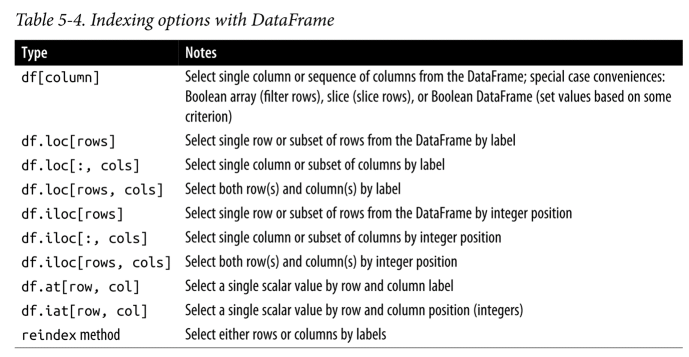

### **Exercise 6**
#### Indexing & Slicing using `.loc()` and `.iloc()`

1. Reload (refresh) the animal data.csv file into a DataFrame name animal
2. Sort the dataFrame according to the “Animal” column. 
3. Set the index using the column “Animal” (sorted).
4. Using .loc() and index slicing, select the first four animals in the DataFrame (ie. from Beetle to Elephant)
5. Using .iloc() and negative slicing, select the last three animals in the DataFrame

In [ ]:
df = pd.read_csv("animal_data.csv")
df

,Animal,Group,Num_Legs,Num_Wings,Significant_Feature
0,Chicken,Bird,2,2,Feathers
1,Guppy,Fish,0,0,Tail
2,Elephant,Mammal,4,0,Trunk
3,Butterfly,Insect,6,4,Wings
4,Giraffe,Mammal,4,0,Long Neck
5,Spider,Arachnid,8,0,Exoskeleton
6,Turtle,Reptile,4,0,Shell
7,Beetle,Insect,6,4,Elytra-Wings


In [93]:
# Sort the dataFrame according to the “Animal” column. 
df = df.sort_values("Animal", ascending = True)
df

,Animal,Group,Num_Legs,Num_Wings,Significant_Feature
7,Beetle,Insect,6,4,Elytra-Wings
3,Butterfly,Insect,6,4,Wings
0,Chicken,Bird,2,2,Feathers
2,Elephant,Mammal,4,0,Trunk
4,Giraffe,Mammal,4,0,Long Neck
1,Guppy,Fish,0,0,Tail
5,Spider,Arachnid,8,0,Exoskeleton
6,Turtle,Reptile,4,0,Shell


In [94]:
# Set the index using the column “Animal” (sorted).

df = df.set_index("Animal")
df

,Group,Num_Legs,Num_Wings,Significant_Feature
Animal,,,,
Beetle,Insect,6,4,Elytra-Wings
Butterfly,Insect,6,4,Wings
Chicken,Bird,2,2,Feathers
Elephant,Mammal,4,0,Trunk
Giraffe,Mammal,4,0,Long Neck
Guppy,Fish,0,0,Tail
Spider,Arachnid,8,0,Exoskeleton
Turtle,Reptile,4,0,Shell


In [98]:
# Using .loc[ ] and index slicing, select the first four animals 
# in the DataFrame (ie. from Beetle to Elephant)

df.loc["Beetle":"Elephant"]

,Group,Num_Legs,Num_Wings,Significant_Feature
Animal,,,,
Beetle,Insect,6,4,Elytra-Wings
Butterfly,Insect,6,4,Wings
Chicken,Bird,2,2,Feathers
Elephant,Mammal,4,0,Trunk


In [99]:
# Using .iloc[ ]  and negative slicing, select the last 
# three animals in the DataFrame

df.iloc[-3:]

,Group,Num_Legs,Num_Wings,Significant_Feature
Animal,,,,
Guppy,Fish,0,0,Tail
Spider,Arachnid,8,0,Exoskeleton
Turtle,Reptile,4,0,Shell


# 8. Others: Stats Operators, String Methods, Changing Column Type

### Stats Methods (mean, min, max, value_count, etc)

Load the student scores dataset:

In [100]:
student_ids = [1001, 1002, 1003, 1004, 1005, 1006, 1007]
names = ['Tom', 'Dick', 'Mary', 'Jim', 'Bob', 'Nick', 'Anne']
science = [85, 25, 70, 78, 68, 79, 80]
maths = [78, 36, 52, 0, 45, 65, 95]
english = [92, 45, 75, 75, 92, 75, 83]

# Create a dictionary from the lists with 'Student ID' as index
data = {
    'Student_IDs' : student_ids,
    'Name': names,
    'Science': science,
    'Maths': maths,
    'English': english
}

# Create a DataFrame from the dictionary with 'Student ID' as index
df = pd.DataFrame(data, index=student_ids)

# Label the index as "student_ids"
df.index.name = 'student_ids'
df

,Student_IDs,Name,Science,Maths,English
student_ids,,,,,
1001,1001,Tom,85,78,92
1002,1002,Dick,25,36,45
1003,1003,Mary,70,52,75
1004,1004,Jim,78,0,75
1005,1005,Bob,68,45,92
1006,1006,Nick,79,65,75
1007,1007,Anne,80,95,83


Pandas have stats functions for example .median() , .mode(), .min(), .max(), .var(), .std(), .sum(), .quantile(), etc that can be applied on its data.

Example: calculate the mean, min and max for the Maths column:

In [101]:
print( df["Maths"].mean(), df["Maths"].min(), df["Maths"].max())

53.0 0 95


Find the number of unique values in the English scores:

In [102]:
df['English'].value_counts()

English
75    3
92    2
45    1
83    1
Name: count, dtype: int64

### String Methods

Pandas DataFrame is equipped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array, as in the code snippet below. 

In [103]:
# convert all names to lowercase:
df["Name"] = df["Name"].str.lower()
df

,Student_IDs,Name,Science,Maths,English
student_ids,,,,,
1001,1001,tom,85,78,92
1002,1002,dick,25,36,45
1003,1003,mary,70,52,75
1004,1004,jim,78,0,75
1005,1005,bob,68,45,92
1006,1006,nick,79,65,75
1007,1007,anne,80,95,83


In [104]:
# Revert back capitalization for names
df["Name"] = df["Name"].str.capitalize()
df

,Student_IDs,Name,Science,Maths,English
student_ids,,,,,
1001,1001,Tom,85,78,92
1002,1002,Dick,25,36,45
1003,1003,Mary,70,52,75
1004,1004,Jim,78,0,75
1005,1005,Bob,68,45,92
1006,1006,Nick,79,65,75
1007,1007,Anne,80,95,83


### Changing Column Type using .astype() 

A common task when working with data is to change the column types in a DataFrame, for example: from string columns to numeric types, from float columns to int,  etc.

Below, we will demonstrate how to use the DataFrame.astype() method.

In [105]:
# Create a new DataFrame for this demo.

df = pd.DataFrame({
    'A': [1, 2, 3, 4, 5],           # integer
    'B': ['a', 'b', 'c', 'd', 'e'], # string
    'C': [1.1, 1.0, 1.3, 2, 5]      # float
})

# Display the Original DataFrame
df

,A,B,C
0,1,a,1.1
1,2,b,1.0
2,3,c,1.3
3,4,d,2.0
4,5,e,5.0


In [106]:
df.dtypes

A      int64
B     object
C    float64
dtype: object

In [107]:
# Convert all columns to strings
df = df.astype(str)
df.dtypes

A    object
B    object
C    object
dtype: object

In [108]:
# Convert column A back to int
df["A"] = df["A"].astype(int)
df.dtypes

A     int64
B    object
C    object
dtype: object

In [109]:
# Convert column C back to float
df["C"] = df["C"].astype(float)
df.dtypes

A      int64
B     object
C    float64
dtype: object

### **Exercise 7**
#### Operatators, Strings, etc etc

1. Use the scores DataFrame for the following exercises
2. Reload and refresh the scores DataFrame. 
3. Convert the Student_ID column into strings
4. Convert all names in the DataFrame to UPPERCASE.
5. Find the highest marks and lowest marks for English
6. Find the average scores for both Science and Maths 

In [111]:
# Place your answers here!
student_ids = [1001, 1002, 1003, 1004, 1005, 1006, 1007]
names = ['Tom', 'Dick', 'Mary', 'Jim', 'Bob', 'Nick', 'Anne']
science = [85, 25, 70, 78, 68, 79, 80]
maths = [78, 36, 52, 0, 45, 65, 95]
english = [92, 45, 75, 75, 92, 75, 83]

# Create a dictionary from the lists with 'Student ID' as index
data = {
    'Student_IDs' : student_ids,
    'Name': names,
    'Science': science,
    'Maths': maths,
    'English': english
}

# Create a DataFrame from the dictionary with 'Student ID' as index
df = pd.DataFrame(data, index=student_ids)

# Label the index as "student_ids"
df.index.name = 'student_ids'
df

,Student_IDs,Name,Science,Maths,English
student_ids,,,,,
1001,1001,Tom,85,78,92
1002,1002,Dick,25,36,45
1003,1003,Mary,70,52,75
1004,1004,Jim,78,0,75
1005,1005,Bob,68,45,92
1006,1006,Nick,79,65,75
1007,1007,Anne,80,95,83


In [113]:
# Place your answers here!
df["Student_IDs"] = df["Student_IDs"].astype(str)
df

,Student_IDs,Name,Science,Maths,English
student_ids,,,,,
1001,1001,Tom,85,78,92
1002,1002,Dick,25,36,45
1003,1003,Mary,70,52,75
1004,1004,Jim,78,0,75
1005,1005,Bob,68,45,92
1006,1006,Nick,79,65,75
1007,1007,Anne,80,95,83


In [114]:
# Place your answers here!
df["Name"] = df["Name"].str.upper()
df

,Student_IDs,Name,Science,Maths,English
student_ids,,,,,
1001,1001,TOM,85,78,92
1002,1002,DICK,25,36,45
1003,1003,MARY,70,52,75
1004,1004,JIM,78,0,75
1005,1005,BOB,68,45,92
1006,1006,NICK,79,65,75
1007,1007,ANNE,80,95,83


In [115]:
df["English"].max()

np.int64(92)

In [116]:
df["English"].min()

np.int64(45)

In [117]:
df["Science"].mean()

np.float64(69.28571428571429)

In [118]:
df["Maths"].mean()

np.float64(53.0)

# 9. Plotting with pandas

pandas has some built-in methods (implemented using matplotlib) that simplify creating visualizations from DataFrame and Series objects. 

We shall look at plotting line plots, box plots and histograms in this section

We will use the COE Pricing 2010-2024 dataset for the following.

In [ ]:
df_coe = pd.read_csv("COE_2010_2024A.csv")

In [120]:
df_coe.head()

,Date,CategoryA,CategoryB,CategoryC,CategoryD,CategoryE
0,1/1/2010,18502,19190,19001,889,19889
1,15/1/2010,20501,22400,20090,852,21899
2,1/2/2010,19989,23180,21390,852,22401
3,15/2/2010,20340,23889,23501,1001,24229
4,1/3/2010,20802,26389,27001,1159,27590


In [121]:
df_coe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       338 non-null    object
 1   CategoryA  338 non-null    int64 
 2   CategoryB  338 non-null    int64 
 3   CategoryC  338 non-null    int64 
 4   CategoryD  338 non-null    int64 
 5   CategoryE  338 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 16.0+ KB


We observe the following:
1. the default index labels are integers 0, 1, 2, 3, 4 …
2. the Date column is not recognized as DateTime object.

Therefore, 
we will first convert the Date column into a DateTime object. 
We then set the Date column as the index for the DataFrame.


In [122]:
df_coe['Date'] = pd.to_datetime(df_coe['Date'], format = "%d/%m/%Y")

In [123]:
df_coe = df_coe.set_index("Date")
df_coe.head()

,CategoryA,CategoryB,CategoryC,CategoryD,CategoryE
Date,,,,,
2010-01-01,18502,19190,19001,889,19889
2010-01-15,20501,22400,20090,852,21899
2010-02-01,19989,23180,21390,852,22401
2010-02-15,20340,23889,23501,1001,24229
2010-03-01,20802,26389,27001,1159,27590


In [124]:
df_coe.info()                                      

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 338 entries, 2010-01-01 to 2024-04-15
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   CategoryA  338 non-null    int64
 1   CategoryB  338 non-null    int64
 2   CategoryC  338 non-null    int64
 3   CategoryD  338 non-null    int64
 4   CategoryE  338 non-null    int64
dtypes: int64(5)
memory usage: 15.8 KB


We can then simply call DataFrame.plot( ) to generate the plot:

<Axes: xlabel='Date'>

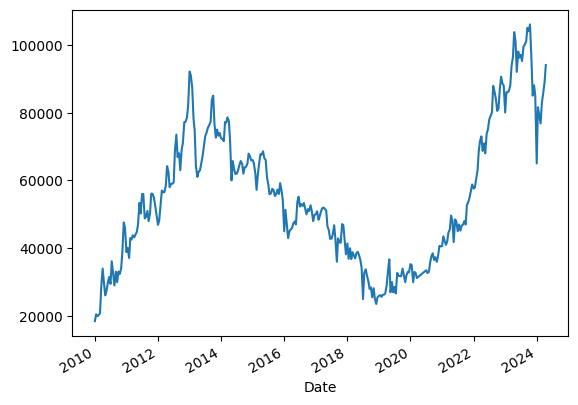

In [125]:
df_coe["CategoryA"].plot( )

<Axes: xlabel='Date'>

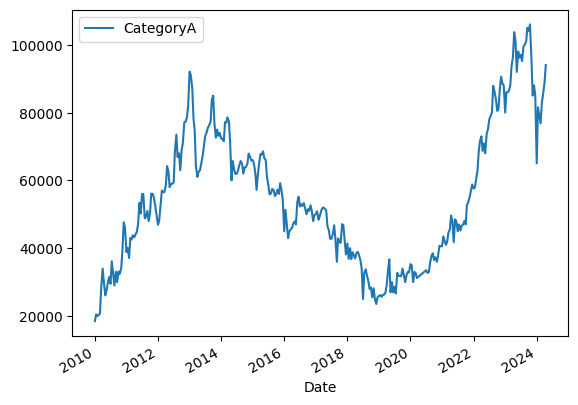

In [126]:
# Alternative command:
df_coe.plot( y = "CategoryA")

We can generate multiple plots by putting the columns in a list:


<Axes: xlabel='Date'>

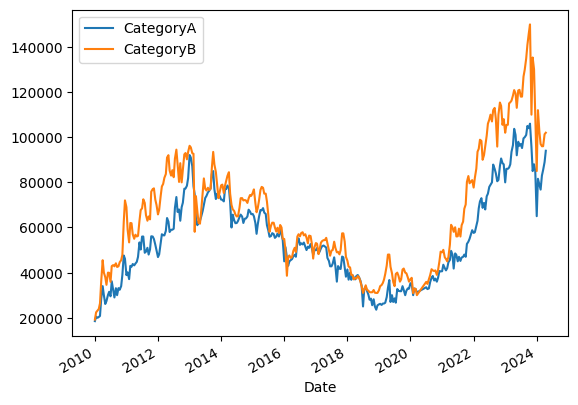

In [127]:
df_coe.plot(y = ["CategoryA", "CategoryB"])

Similarly, pandas can generate bar plots and histograms.
To generate a vertical bar plot (example here for 2024 Jan-Apr data only): 


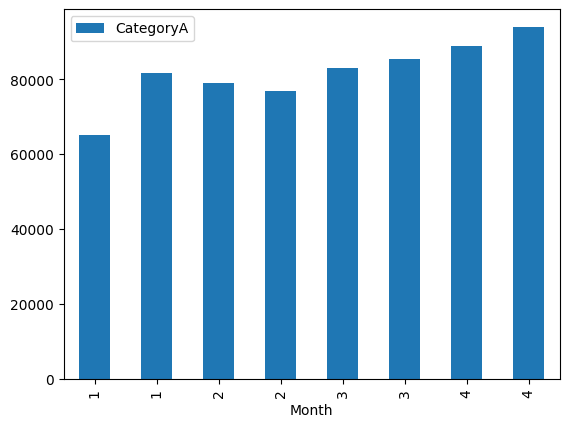

In [129]:
# Extract COE results for year 2024
coe_2024 = df_coe.loc["2024"]

# Extract month information and store in new Month column
coe_2024["Month"] = coe_2024.index.month

# Plot the bar chart for CatA and CatB results
ax = coe_2024.plot(x = "Month", y = "CategoryA", kind="bar")


Lastly, we can generate a histogram easily using `.hist()`

The following produces a quick-and-simple distribution plot of the COE price over the period 2010-2024 (present):

<Axes: >

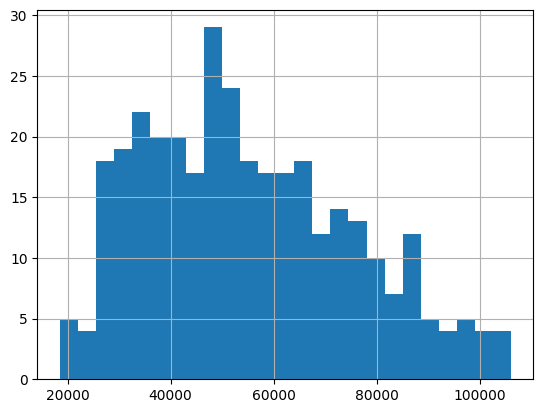

In [130]:
df_coe["CategoryA"].hist(bins=25)

### **Exercise 8**

#### Plotting with pandas

Continue and use the COE Price DataFrame `df_coe` for the following:
1. Try plotting df_coe without specifying any columns, ie. df_coe.plot(), and explain what happened. 
2. Plot the line plot for the year 2023 only, for both CatA and CatB, complete with markers, axis labels and titles and legends, as shown below (fig left).
3. Convert the plot into a bar plot (for 2023, CatA and CatB) , complete with axis labels and titles, etc, as shown below (fig right).



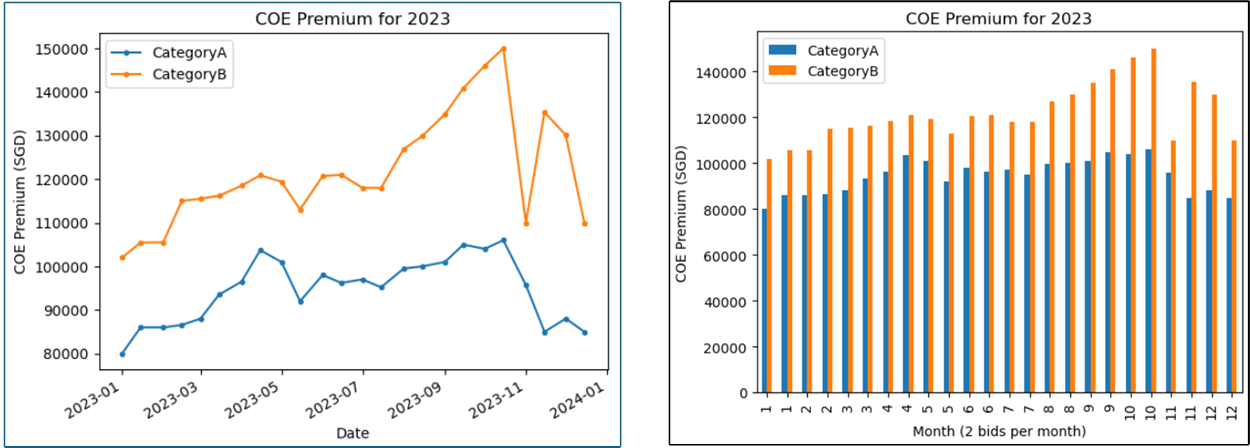

In [ ]:
# Place your answers here!
df_coe = pd.read_csv("COE_2010_2024A.csv")
df_coe

,Date,CategoryA,CategoryB,CategoryC,CategoryD,CategoryE
0,1/1/2010,18502,19190,19001,889,19889
1,15/1/2010,20501,22400,20090,852,21899
2,1/2/2010,19989,23180,21390,852,22401
3,15/2/2010,20340,23889,23501,1001,24229
4,1/3/2010,20802,26389,27001,1159,27590
...,...,...,...,...,...,...
333,15/2/2024,76801,97000,73001,8911,94006
334,1/3/2024,83000,96010,75599,9400,95010
335,15/3/2024,85489,96011,70112,9689,95856
336,1/4/2024,89000,101334,67501,10000,101002


<Axes: >

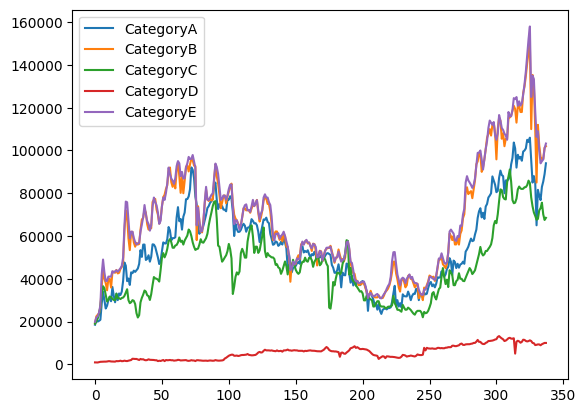

In [133]:
# Place your answers here!
df_coe.plot()

#### The graphs for all five categories in df_coe were plotted.

In [138]:
# 2. Plot the line plot for the year 2023 only, for both CatA and CatB, complete with markers, axis labels and titles and legends, as shown below (fig left).

df_coe_2023_only = df_coe[df_coe['Date'].apply(lambda x: x.split("/")[-1]=='2023')]
df_coe_2023_only

,Date,CategoryA,CategoryB,CategoryC,CategoryD,CategoryE
306,1/1/2023,80000,102002,77301,10890,107889
307,15/1/2023,86000,105459,77109,11101,107000
308,1/2/2023,86000,105524,85119,11602,105002
309,15/2/2023,86556,115001,87790,12189,118001
310,1/3/2023,88000,115501,91101,12390,116000
311,15/3/2023,93503,116201,85389,12001,116020
312,1/4/2023,96501,118501,76801,12001,118990
313,15/4/2023,103721,120889,75334,12179,124501
314,1/5/2023,101001,119399,75589,5002,124002
315,15/5/2023,92000,113034,77501,10602,125000


<Axes: title={'center': 'COE Premium for 2023'}, xlabel='Date', ylabel='COE Premium (SGD)'>

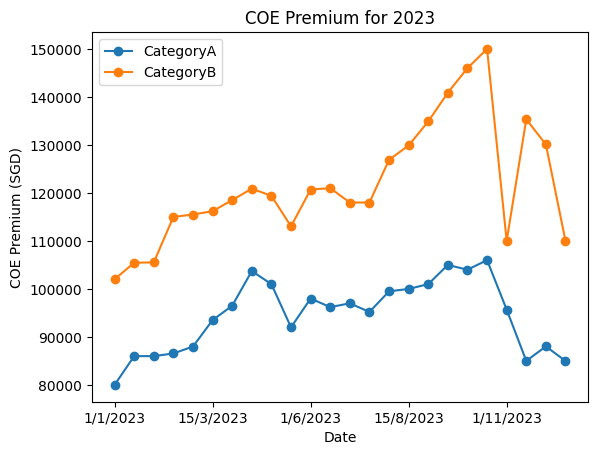

In [139]:
df_coe_2023_only.plot(x = "Date",
                 y = ["CategoryA", "CategoryB"], 
                 marker = "o", title = "COE Premium for 2023", xlabel = "Date", ylabel = "COE Premium (SGD)")

<Axes: title={'center': 'COE Premium for 2023'}, xlabel='Month (2 bids per month)', ylabel='COE Premium (SGD)'>

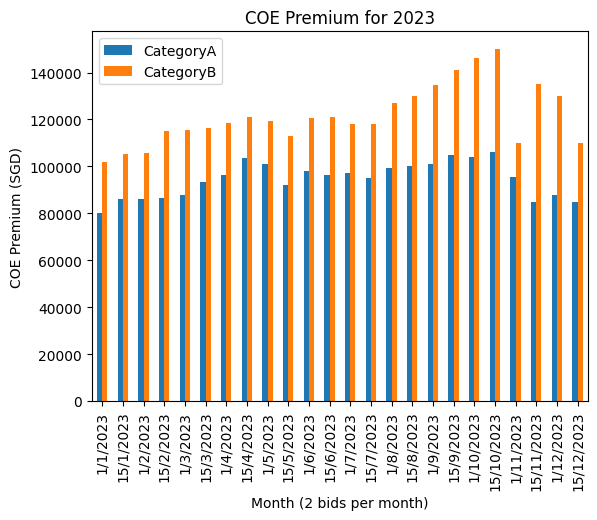

In [141]:
df_coe_2023_only.plot(x = "Date",
                 y = ["CategoryA", "CategoryB"], 
                 kind = "bar", title = "COE Premium for 2023", xlabel = "Month (2 bids per month)", ylabel = "COE Premium (SGD)")